In [1]:
import pickle as pkl
import numpy as np
import matplotlib
#matplotlib.rcParams.update({'font.size': 40})
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd
import os
import time
from collections import OrderedDict
import getpass
from summary_utils import read_mols_baseline, read_mols_baseline2, read_mols_neuralnet
%matplotlib inline

def data_path():
    """Path to data depending on user launching the script"""
    if getpass.getuser() == "mansimov":
        return "/Users/mansimov/projects/dl4chem-geometry-local/saved_confs"
    else:
        return "/scratch/em3382/chemgeom/saved_confs"

In [2]:
dataset = 'CSD'
num_conformers = [100]

In [3]:
etkdg_ff_mols = read_mols_baseline2('{}/etkdg_ff/{}/_test_/mols'.format(data_path(), dataset), num_conformers)

done 0 out of 2999
done 500 out of 2999
done 1000 out of 2999
done 1500 out of 2999
done 2000 out of 2999
done 2500 out of 2999
time took 2.2828779220581055


In [4]:
mpnn_mols = read_mols_neuralnet('{}/mpnn/{}/_test_/'.format(data_path(), dataset), num_conformers)

done 0 out of 3000
done 500 out of 3000
done 1000 out of 3000
done 1500 out of 3000
done 2000 out of 3000
done 2500 out of 3000
time took 4.6839001178741455


In [5]:
mols_summary = {}
mols_summary["method"] = []
mols_summary["results"] = []
mols_summary["num_conformers"] = []

overlap_keys = []
for k in etkdg_ff_mols.keys():
    if k in mpnn_mols.keys():
        overlap_keys.append(k)

for n_conf in num_conformers:
    etkdg_mmff_results = [etkdg_ff_mols[mol_num]['median_mmff'][n_conf] for mol_num in overlap_keys]
    etkdg_uff_results = [etkdg_ff_mols[mol_num]['median_uff'][n_conf] for mol_num in overlap_keys]

    mols_summary['method'] = mols_summary['method'] + ["ETKDG + MMFF"] * len(etkdg_mmff_results) + ["ETKDG + UFF"] * len(etkdg_uff_results)
    mols_summary['results'] = mols_summary['results'] + etkdg_mmff_results + etkdg_uff_results
    mols_summary['num_conformers'] = mols_summary['num_conformers'] + [n_conf] * len(etkdg_mmff_results + etkdg_uff_results)

    mpnn_results = [mpnn_mols[mol_num]['median_rmsd'][n_conf] for mol_num in overlap_keys]

    mols_summary['method'] = mols_summary['method'] + ["MPNN"] * len(mpnn_results)
    mols_summary['results'] = mols_summary['results'] + mpnn_results
    mols_summary['num_conformers'] = mols_summary['num_conformers'] + [n_conf] * len(mpnn_results)

for k in mols_summary.keys():
    mols_summary[k] = np.array(mols_summary[k])

(8766,)
(8766,)
(8766,)


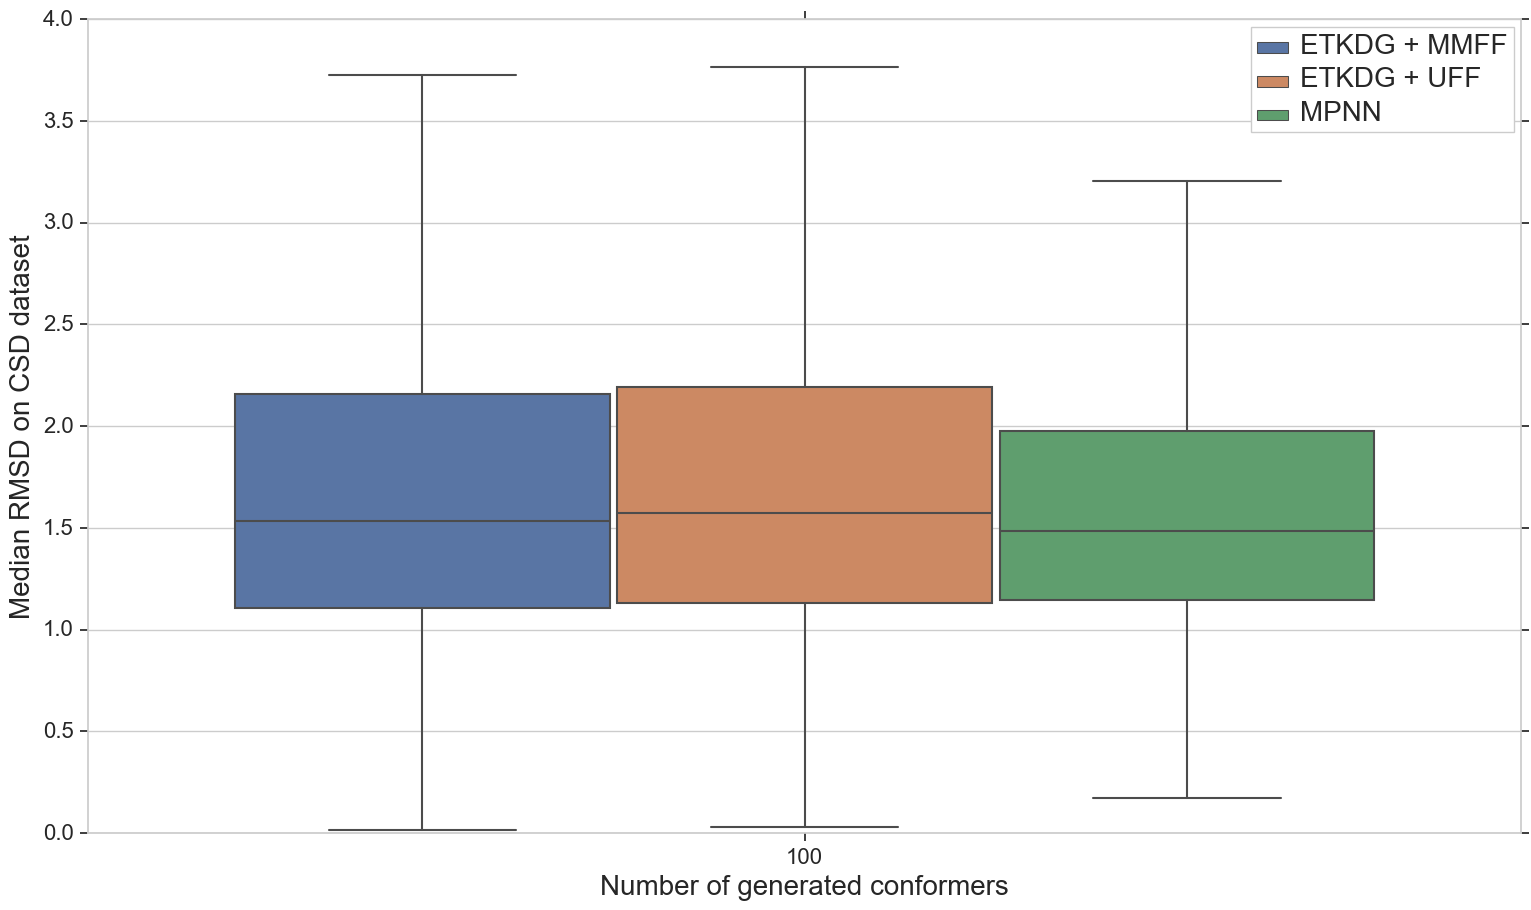

In [6]:
mols_summary["results"] = pd.Series(mols_summary["results"], dtype="float32")
mols_summary["method"] = pd.Series(mols_summary["method"], dtype="category")
mols_summary["num_conformers"] = pd.Series(mols_summary["num_conformers"], dtype="category")

print (mols_summary["results"].shape)
print (mols_summary["method"].shape)
print (mols_summary["num_conformers"].shape)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#ax = sns.boxplot(x="method", y="results", hue="num_conformers", data=ff_mols_summary)
ax = sns.boxplot(x="num_conformers", y="results", hue="method", data=mols_summary, showfliers=False)
ax.set_xlabel('Number of generated conformers', fontsize=20)
#ax.set_ylabel('Minimum RMSD on {} dataset'.format(dataset), fontsize=20)
ax.set_ylabel('Median RMSD on {} dataset'.format(dataset), fontsize=20)
plt.legend(loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
ax.tick_params(labelsize=16)
